<h1 style="color:#2C3E50; font-size:28px;">🏥 Hospital Management Data Analysis</h1>
<p style="font-size:14px;"><strong>Author:</strong> Astrid Villalobos</p>
<p style="font-size:14px;"><strong>Date:</strong> July 2025</p>

<hr style="border:0.5px solid lightgray;">

<h3>📌 Objective</h3>
<p style="font-size:14px;">
This analysis explores a fictional hospital management dataset to practice identifying trends in appointments, patient demographics, and billing, simulating data-driven decisions in healthcare delivery and cost management. As a practice project, it demonstrates my skills in Python, Pandas, and Power BI while addressing challenges like optimizing scheduling and resource allocation, relevant to Montreal’s healthcare system where efficiency is critical for patient satisfaction and operational success.
</p>

<h3>🎯 Relevance</h3>
<p style="font-size:14px;">
This project is designed to showcase analytical skills applicable to healthcare organizations in Montreal, such as the CIUSSS or private clinics, where data-driven insights can enhance resource planning and patient care in a resource-constrained environment.
</p>


---



## Notebook Structure
This analysis is divided into the following sections:

0. Setup
1. Data Cleaning
2. Feature Engineering
3. Exploratory Data Analysis (EDA)
-  3.1 Overall Average Age of Patients
-  3.2 Total Patients by Gender
-  3.3 Average Patient Age by Gender
-  3.4 Age Distribution Curve by Gender
-  3.5 Age Group with the Most Patients
-  3.6 Average Age by Treatment Type
-  3.7 Appointment Distribution by Day of the Week
-  3.8 Appointment by Day and Week
-  3.9 Total Cost by Treatment Type
-  3.10 Top 10 Patients by Total Billed Amount
-  3.11 Monthly Billing Totals
4. Specific Insights
5. Summary
6. Limitations
7. Data Export

Dataset source: [Kaggle - Hospital Management Dataset](https://www.kaggle.com/datasets/kanakbaghel/hospital-management-dataset)

---
## 0. Setup

### Import Libraries

In [4]:
# Import libraries
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Initial setup
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Check library versions for reproducibility
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
        

Pandas: 2.2.3
NumPy: 2.1.3
Seaborn: 0.13.2


### Load data

In [5]:
try:
    # Load CSV files into separate DataFrames
    df_appointments = pd.read_csv('appointments.csv')
    df_billing = pd.read_csv('billing.csv')
    df_doctors = pd.read_csv('doctors.csv')
    df_patients = pd.read_csv('patients.csv')
    df_treatments = pd.read_csv('treatments.csv')

    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Check the file path.")

df_appointments['appointment_date'] = pd.to_datetime(df_appointments['appointment_date'], format='%Y-%m-%d')

Data loaded successfully.


## 1. Data Cleaning

### Check columns, types, and null values

In [3]:
# Display first rows
display(df_appointments.head())
display(df_patients.head())
display(df_doctors.head())

# Data types and missing values
print("\nAppointments Info:")
df_appointments.info()
print("\nPatients Info:")
df_patients.info()
print("\nDoctors Info:")
df_doctors.info()

# Descriptive statistics
display(df_appointments.describe())
display(df_patients.describe())

,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show


,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


,doctor_id,first_name,last_name,specialization,phone_number,years_experience,hospital_branch,email
0,D001,David,Taylor,Dermatology,8322010158,17,Westside Clinic,dr.david.taylor@hospital.com
1,D002,Jane,Davis,Pediatrics,9004382050,24,Eastside Clinic,dr.jane.davis@hospital.com
2,D003,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com
3,D004,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
4,D005,Sarah,Taylor,Dermatology,9118538547,26,Central Hospital,dr.sarah.taylor@hospital.com



Appointments Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    200 non-null    object        
 1   patient_id        200 non-null    object        
 2   doctor_id         200 non-null    object        
 3   appointment_date  200 non-null    datetime64[ns]
 4   appointment_time  200 non-null    object        
 5   reason_for_visit  200 non-null    object        
 6   status            200 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.1+ KB

Patients Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          50 non-null     object
 1   first_name          50 non-null     object
 2   last_name     

,appointment_date
count,200
mean,2023-06-17 11:38:24
min,2023-01-01 00:00:00
25%,2023-03-27 18:00:00
50%,2023-06-10 00:00:00
75%,2023-09-15 12:00:00
max,2023-12-30 00:00:00


,contact_number
count,5.000000e+01
mean,7.817283e+09
std,9.573594e+08
min,6.141952e+09
25%,7.065593e+09
50%,7.749927e+09
75%,8.599947e+09
max,9.900972e+09


In [4]:
print(df_patients.columns.tolist())


['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email']


### Check for missing values
df_patients.isnull().sum()

In [5]:
# Check for missing values
print("Missing values per table:")
print(df_appointments.isnull().sum())
print(df_patients.isnull().sum())
print(df_doctors.isnull().sum())
print(df_treatments.isnull().sum())
print(df_billing.isnull().sum())

Missing values per table:
appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64
patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64
doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64
treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64
bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64


### *Data Quality Check – Missing Values*
I evaluated all five tables for missing values and confirmed that none of the columns contain null entries. As a result, no imputation or row removal was necessary. This indicates that the dataset is complete and ready for further analysis.


In [6]:
df_patients.head()


,patient_id,first_name,last_name,gender,date_of_birth,contact_number,address,registration_date,insurance_provider,insurance_number,email
0,P001,David,Williams,F,1955-06-04,6939585183,789 Pine Rd,2022-06-23,WellnessCorp,INS840674,david.williams@mail.com
1,P002,Emily,Smith,F,1984-10-12,8228188767,321 Maple Dr,2022-01-15,PulseSecure,INS354079,emily.smith@mail.com
2,P003,Laura,Jones,M,1977-08-21,8397029847,321 Maple Dr,2022-02-07,PulseSecure,INS650929,laura.jones@mail.com
3,P004,Michael,Johnson,F,1981-02-20,9019443432,123 Elm St,2021-03-02,HealthIndia,INS789944,michael.johnson@mail.com
4,P005,David,Wilson,M,1960-06-23,7734463155,123 Elm St,2021-09-29,MedCare Plus,INS788105,david.wilson@mail.com


In [7]:
df_doctors.head()
df_appointments.head()
df_billing.head()
df_treatments.head()

,treatment_id,appointment_id,treatment_type,description,cost,treatment_date
0,T001,A001,Chemotherapy,Basic screening,3941.97,2023-08-09
1,T002,A002,MRI,Advanced protocol,4158.44,2023-06-09
2,T003,A003,MRI,Standard procedure,3731.55,2023-06-28
3,T004,A004,MRI,Basic screening,4799.86,2023-09-01
4,T005,A005,ECG,Standard procedure,582.05,2023-07-06


### *Gender inconsistencies*

In [8]:
# Correct gender inconsistencies based on first names
# Define lists of typically male and female names for reference
male_names = ['David', 'Michael', 'John', 'James', 'Robert']
female_names = ['Emily', 'Laura', 'Sarah', 'Jessica', 'Jennifer']

# Create a function to assign gender based on first name
def correct_gender(row):
    if row['first_name'] in male_names and row['gender'] == 'F':
        return 'M'
    elif row['first_name'] in female_names and row['gender'] == 'M':
        return 'F'
    else:
        return row['gender']

# Apply correction to the patients DataFrame
df_patients['gender'] = df_patients.apply(correct_gender, axis=1)

# Verify corrections
print("Gender corrections applied. Updated gender counts:")
print(df_patients['gender'].value_counts())

# Re-check for remaining inconsistencies
remaining_inconsistencies = df_patients[
    (df_patients['gender'] == 'F') & (df_patients['first_name'].isin(male_names)) |
    (df_patients['gender'] == 'M') & (df_patients['first_name'].isin(female_names))
]
print("\nRemaining gender inconsistencies after correction:")
print(remaining_inconsistencies[['patient_id', 'first_name', 'gender']])

Gender corrections applied. Updated gender counts:
gender
M    29
F    21
Name: count, dtype: int64

Remaining gender inconsistencies after correction:
Empty DataFrame
Columns: [patient_id, first_name, gender]
Index: []


---

## 2. Feature Engineering

### Calculate Patient Age
To perform demographic analysis, we calculate the age of each patient from the `date_of_birth` field. This will allow us to generate age distributions and perform grouped analysis by age later in the notebook.


In [9]:
# Age

from datetime import datetime

df_patients['date_of_birth'] = pd.to_datetime(df_patients['date_of_birth'], errors='coerce')

today = pd.to_datetime("today")

df_patients['age'] = df_patients['date_of_birth'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)) if pd.notnull(dob) else None)

df_patients[['date_of_birth', 'age']].head()

,date_of_birth,age
0,1955-06-04,70
1,1984-10-12,40
2,1977-08-21,47
3,1981-02-20,44
4,1960-06-23,65


---

## 3. Exploratory Data Analysis (EDA)

#### 3.1. Overall Average Age of Patients

In this section, we explore patient demographics, focusing on the overall average age. Understanding the age profile of patients provides insights into service needs, resource planning, and treatment priorities.


In [10]:
df_patients['age'].mean()

np.float64(44.62)

The overall average patient age is 44.62 years.



<hr style="border: 0.5px dashed #f2f2f2;">


#### 3.2. Total Patient by Gender

This section analyzes the gender distribution of patients. Knowing the gender breakdown can help in designing targeted healthcare programs and understanding population trends.


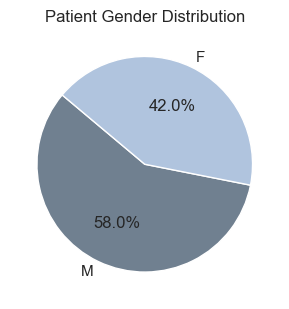

In [11]:
# Count total patients by gender
total_by_gender = df_patients['gender'].value_counts()

# Create a pie chart, tittle and display the chart
plt.figure(figsize=(3.5, 3.5))  
plt.pie(
    total_by_gender,                        
    labels=total_by_gender.index,          
    autopct='%1.1f%%',                        
    startangle=140,                           
    colors=['slategrey','lightsteelblue','white'], 
)

plt.title('Patient Gender Distribution')

plt.show()

The distribution by gender indicates that 58% is represented by the male group and 42% by the female group.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.3. Average Patient Age by Gender

Here, I examine the average age for each gender group. This information is useful to detect any differences in age-related healthcare needs between male and female patients.



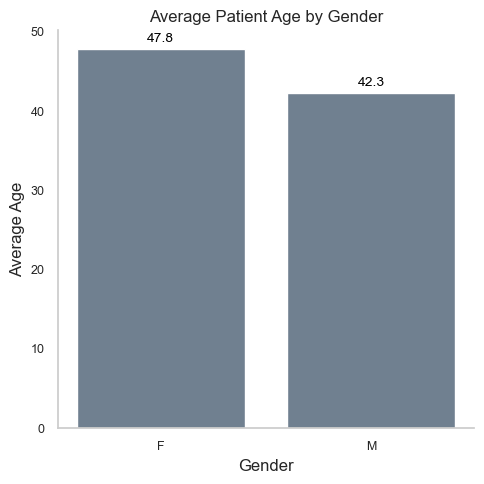

In [12]:
# Calculate the average age by gender
avg_age_by_gender = df_patients.groupby('gender')['age'].mean()

# Create bar chart, add tittle and axis labels, average values above each bar 
plt.figure(figsize=(5, 5))
bars = plt.bar(avg_age_by_gender.index, avg_age_by_gender.values, color='slategrey')

plt.title('Average Patient Age by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.grid(False)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,   
        height + 0.5,                        
        f'{height:.1f}',                     
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

The average age is 47.8 for females and 42.3 for males.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.4. Age Distribution Curve by Gender

We visualize the age distribution across gender groups to identify common age ranges and detect potential skewness or concentration in certain age brackets. This supports better planning of age-specific treatments and facilities.

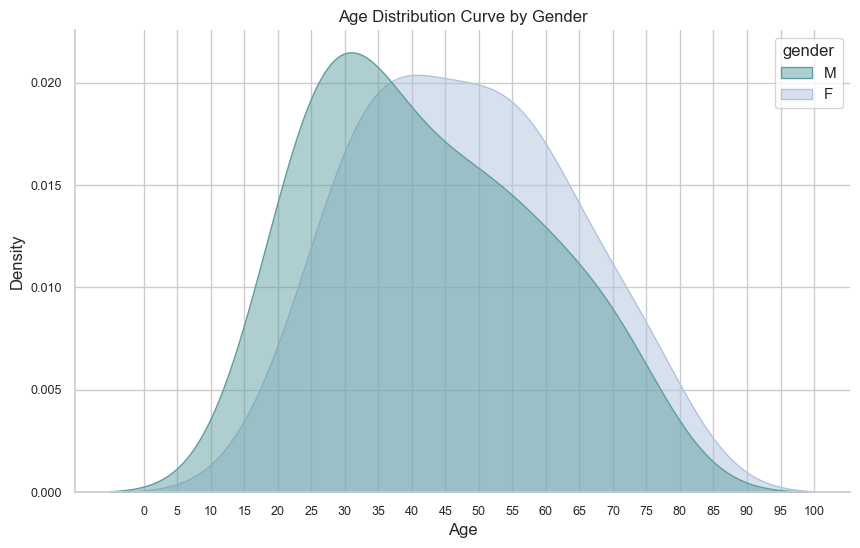

In [13]:
# Kernel Density Estimation (KDE) showing age distribution separated by gender

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_patients,
    x='age',
    hue='gender',
    fill=True,
    common_norm=False,
    alpha=0.5,
    palette={'F': 'lightsteelblue', 'M': 'cadetblue'}
)

plt.title('Age Distribution Curve by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)

# Ajustar los ticks del eje X para que vayan de 0 a 100 en pasos de 5
plt.xticks(ticks=range(0, 105, 5), fontsize=9)
plt.yticks(fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


The age distribution curves for male and female patients reveal the following patterns:

Female patients tend to be slightly older on average, with their age distribution peaking around 35–55 years and showing a longer tail beyond 60 years.

Male patients exhibit a peak closer to 25–40 years, with a sharper rise and slightly less representation in older age brackets.

Both distributions are right-skewed, indicating a higher concentration of younger and middle-aged adults, but with a noticeable presence of elderly patients—especially among females.

This demographic insight suggests the hospital serves a wide age range, with potential emphasis on adult and geriatric care, particularly for women.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.5. Age Group with the Most Patients

This analysis identifies which age group contains the highest number of patients. Segmenting patients into age categories allows for targeted care strategies and better service allocation.

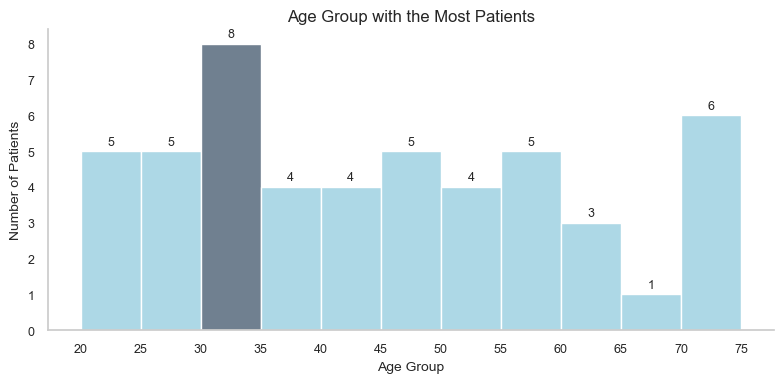

In [14]:
# Create histogram with custom bins
plt.figure(figsize=(8, 4))
bins = range(20, int(df_patients['age'].max()) + 5, 5)
counts, bins, patches = plt.hist(df_patients['age'], bins=bins, color='lightblue')

# Highlight the 31–40 age group
highlight_bin = range(30, 34) 
for patch, bin_left in zip(patches, bins[:-1]):
    if bin_left in [30, 34]: 
        patch.set_facecolor('slategrey')

# Add titles and labels
plt.title('Age Group with the Most Patients', fontsize=12)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Patients', fontsize=10)
plt.xticks(bins, fontsize=9)
plt.yticks(fontsize=9)

# Remove top and right spines for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels on top of each bar
for count, patch in zip(counts, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    plt.text(x, y + 0.1, int(count), ha='center', va='bottom', fontsize=9)

# Disable grid for clarity
plt.grid(False)
plt.tight_layout()

The age group with the highest number of patients is between 30 and 35, totaling 8 patients.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.6. Average Age by Treatment Type

In this section, I evaluate the average age of patients receiving each treatment type. Understanding which age groups receive which treatments helps assess the effectiveness and appropriateness of clinical offerings.

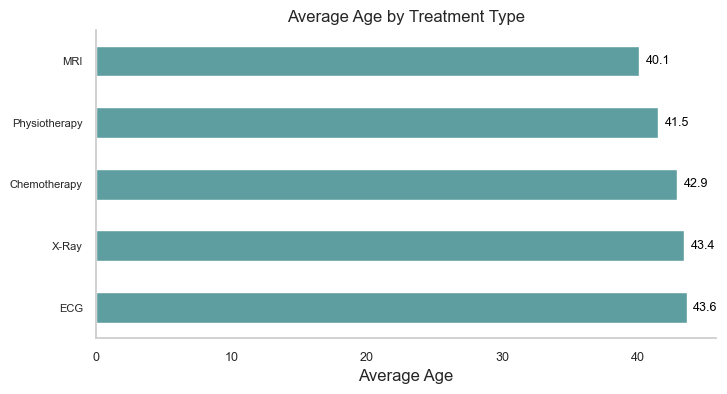

In [15]:
# Merge df_appoinments with df_patients to associate patient_id with age
df_merge1 = pd.merge(df_treatments, df_appointments[['appointment_id', 'patient_id']], on='appointment_id', how='left')

# Merge the result with df_treatments to bring in treatment_type
df_merge2 = pd.merge(df_merge1, df_patients[['patient_id', 'age']], on='patient_id', how='left')

# Group by treatment_type and calculate the average age
avg_age_by_treatment = df_merge2.groupby('treatment_type')['age'].mean().sort_values()

plt.figure(figsize=(8, 4))
avg_age_by_treatment.plot(kind='barh', color='cadetblue')
plt.title('Average Age by Treatment Type')
plt.xlabel('Average Age')
plt.ylabel('')
plt.grid(False)
plt.gca().invert_yaxis()
plt.xticks(fontsize=9)
plt.yticks(fontsize=8)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(avg_age_by_treatment):
    ax.text(value + 0.5, i, f'{value:.1f}', va='center', fontsize=9, color='black')

plt.show()


The average age for ECG is 43.6, X-Ray is 43.4, Chemotherapy is 42.8, Physiotherapy is 41.4 and MRI is 40 years old.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.7. Appointment Distribution by Day of the Week

I analyze the frequency of appointments across the week to determine the busiest days. This is useful for staffing, scheduling, and improving patient flow management.

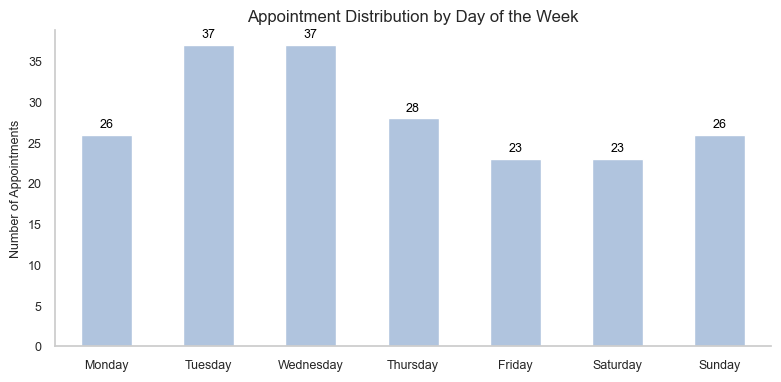

In [16]:
# Ensure 'appoinment_date' is in datetime format
df_appointments['appointment_date'] = pd.to_datetime(df_appointments['appointment_date'], errors='coerce')

# Extract the day of the week from the appoinment date (0=Monday, 6=Sunday)
df_appointments['day_of_week'] = df_appointments['appointment_date'].dt.day_name()

# Count the number of appoinments per day of the week
appointments_by_day = df_appointments['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot the distribution and display the chart
plt.figure(figsize=(8, 4))
appointments_by_day.plot(kind='bar', color='lightsteelblue')
plt.title('Appointment Distribution by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Appointments', fontsize=9)
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, value in enumerate(appointments_by_day):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9, color='black')

plt.show()

Tuesday and Wednesday are the busiest days for appointments.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.8. Appointment by Day and Week

I analyze the distribution of appointments by day of the week to identify patterns in patient demand. This insight helps optimize staff allocation, improve scheduling efficiency, and enhance overall operational planning.

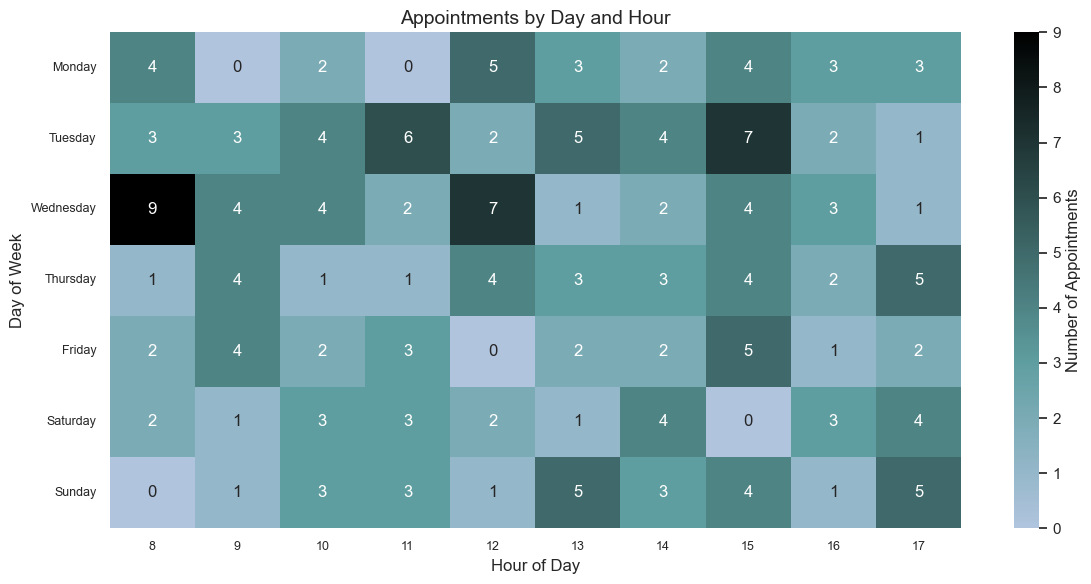

In [17]:
# Define custom color palette transitioning from darkseagreen to tan
colors = ['lightsteelblue', 'cadetblue', 'darkslategrey', 'black']  # darkseagreen, tan, dark brown
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Ensure day_of_week is ordered correctly
df_appointments['day_of_week'] = pd.Categorical(
    df_appointments['day_of_week'], 
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    ordered=True
)

# Extract hour from appointment_time (format HH:MM:SS)
df_appointments['hour'] = df_appointments['appointment_time'].str.split(':').str[0].astype(int)

# Create pivot table for heatmap with observed=True to suppress FutureWarning
heatmap_data = df_appointments.pivot_table(
    index='day_of_week', 
    columns='hour', 
    aggfunc='size', 
    fill_value=0,
    observed=True  # Only include days with data
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap=custom_cmap, annot=True, fmt='d', cbar_kws={'label': 'Number of Appointments'})
plt.title('Appointments by Day and Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()

The analysis of appointment distribution by day and hour reveals a clear pattern of higher activity during weekdays, especially in the mornings and early afternoons. Wednesday stands out as the day with the highest demand, suggesting the need for strategic staff allocation. The low activity during the weekend could be assessed to optimize resource usage. This type of analysis supports better operational planning and enhances the patient experience.

#### 3.9. Total Cost by Treatment Type

This section explores the total cost associated with each treatment type. Understanding cost distribution supports budgeting, financial planning, and identifying high-cost procedures for potential optimization.

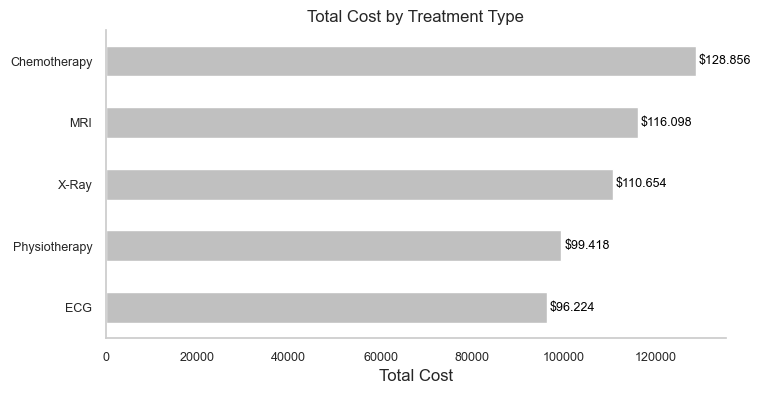

In [18]:
# Group the data by treatment type and sum the costs, then sort in descending order
cost_by_treatment = df_treatments.groupby('treatment_type')['cost'].sum().sort_values(ascending=False)

# Set up the figure size for the horizontal bar chart
plt.figure(figsize=(8, 4))

# Plot the total cost per treatment type as a horizontal bar chart
cost_by_treatment.plot(kind='barh', color='silver')

# Set chart title and axis labels
plt.title('Total Cost by Treatment Type')
plt.xlabel('Total Cost')
plt.ylabel('')  # No label for the y-axis (treatment types are already shown)

# Remove the grid for a cleaner look
plt.grid(False)

# Invert y-axis to show highest-cost treatments at the top
plt.gca().invert_yaxis()

# Adjust font sizes for readability
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Remove the top and right borders (spines) for a minimal design
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Define a small offset to position the text labels slightly after the bars
max_value = max(cost_by_treatment)
offset = max_value * 0.005

# Add value labels at the end of each bar
for i, value in enumerate(cost_by_treatment):
    formatted_value = f"${value:,.0f}".replace(",", ".")  # Format number and replace comma with dot
    ax.text(value + offset, i, formatted_value, va='center', ha='left', fontsize=9, color='black')

# Display the plot
plt.show()

Chemotherapy and MRI are the most expensive types of treatments.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.10.  Top 10 Patients by Total Billed Amount

We identify the top 10 patients based on total billing. This can help detect high-value patients, potential outliers, or cases that require financial or administrative review.

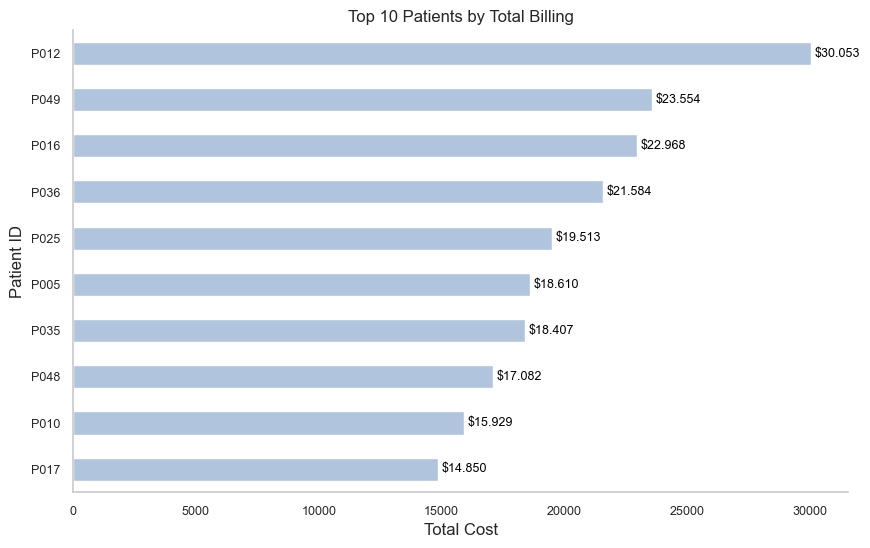

In [19]:
# Merge treatments with appoinments to get patients_id
df_treatments_with_patients = pd.merge(df_treatments, df_appointments[['appointment_id', 'patient_id']], on='appointment_id', how='inner')

billing_by_patient = df_treatments_with_patients.groupby('patient_id')['cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
billing_by_patient.head(10).plot(kind='barh', color='lightsteelblue')
plt.title('Top 10 Patients by Total Billing')
plt.xlabel('Total Cost')
plt.ylabel('Patient ID')
plt.grid(False)
plt.gca().invert_yaxis()

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

max_value = max(billing_by_patient.head(10))
offset = max_value * 0.005

for i, value in enumerate(billing_by_patient.head(10)):
    formatted_value = f"${value:,.0f}".replace(",", ".")
    ax.text(value + offset, i, formatted_value, va='center', fontsize=9, color='black')
    
plt.show()

Patients P012 and P049 have the highest billing amounts during the analyzed period.

<hr style="border: 0.5px dashed #f2f2f2;">

#### 3.11. Monthly Billing Totals

This part provides an overview of total billed amounts by month, helping to identify seasonal trends or monthly fluctuations in revenue. It also helps evaluate the hospital’s financial performance over time.

In [20]:
# Generate summary statistics for the 'amount' column to understand the distribution of billing amounts.
df_billing['amount'].describe()


count     200.000000
mean     2756.249250
std      1298.125308
min       534.030000
25%      1563.412500
50%      2828.165000
75%      3836.627500
max      4973.630000
Name: amount, dtype: float64

Monthly Billed Amounts (2023):
 month month_name   amount
     1    January 58701.23
     2   February 36669.69
     3      March 47304.29
     4      April 64271.54
     5        May 48791.05
     6       June 56887.82
     7       July 39880.19
     8     August 41958.67
     9  September 33426.53
    10    October 43314.15
    11   November 52474.98
    12   December 27569.71


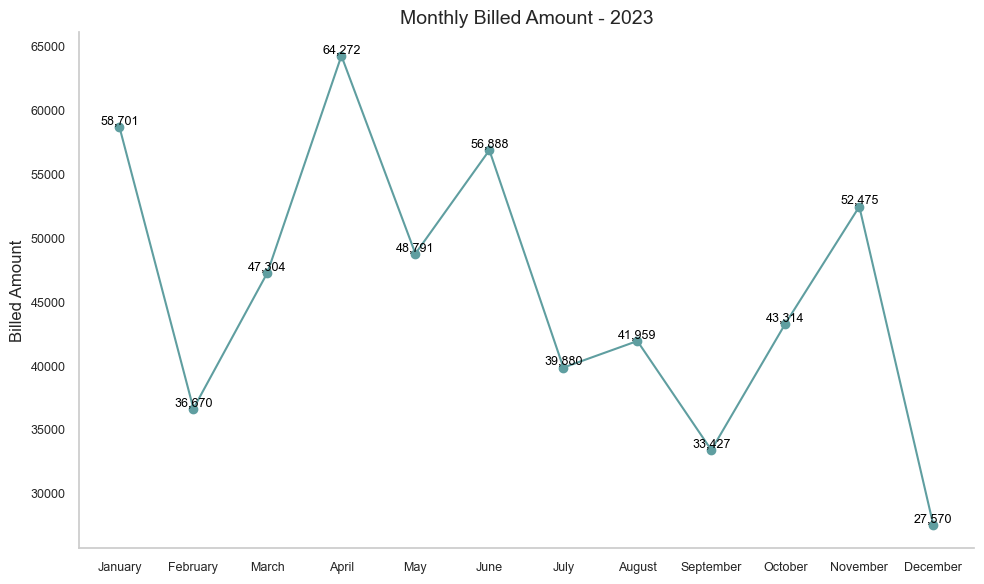

In [21]:
# Ensure 'bill date' is of datetime type
df_billing['bill_date'] = pd.to_datetime(df_billing['bill_date'])

# Extract month as a number
df_billing['month'] = df_billing['bill_date'].dt.month

# Group by month and sum the billed amount
monthly_total = df_billing.groupby('month')['amount'].sum().reset_index()

# Add month name for clearer labeling
monthly_total['month_name'] = monthly_total['month'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')
)

# Sort by month number to ensure correct order
monthly_total = monthly_total.sort_values('month')

# Add month name for clearer labeling
monthly_total = monthly_total[['month', 'month_name', 'amount']]

# Display the table
print("Monthly Billed Amounts (2023):")
print(monthly_total.to_string(index=False))

# Create a line plot and add values above each point
plt.figure(figsize=(10, 6))
plt.plot(monthly_total['month_name'], monthly_total['amount'], marker='o', linestyle='-', color='cadetblue')

for i, row in monthly_total.iterrows():
    plt.text(row['month_name'], row['amount'], f"{row['amount']:,.0f}",
             ha='center', va='bottom', fontsize=9, color='black')

plt.title('Monthly Billed Amount - 2023', fontsize=14)
plt.xlabel('')
plt.ylabel('Billed Amount', fontsize=12)
plt.xticks(fontsize=9, rotation=0)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='', alpha=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


---

## 4. Specific Insights – Answer predefined business questions.

- **What is the average age of all patients?**
  → The average patient age is 44.6 years.

- **Are there more male or female patients?**
  → There are more male patients (58%) than male patients (42%).

- **Which treatment types generate the highest costs?**
  → Chemotherapy and MRI are the most expensive treatment types.

- **What are the busiest days for appointments?**
  → Tuesdays and Wednesdays see the highest number of appointments.

- **Which month had the highest total billing?**
  → April 2023 had the highest total billing.



---
## 5. Summary – Highlight key findings.
- Tuesday and Wednesday are the busiest days for appointments.
- Chemotherapy and MRI are the most expensive types of treatments.
- The month with the highest billing was April 2023.
- The average age of patients identified as female is higher than that of those identified as male.

#### Next Steps
- Create interactive visualizations in Power BI.
- Explore predictive models for appointment cancellations.

## 6. Limitations

This analysis is based on a fictional hospital management dataset designed for practice purposes, which introduces several limitations:

- **Limited Sample Size**: The dataset includes only 50 patients and 200 appointments, which may not represent the complexity of real-world hospital operations.
- **Fictional Data**: As the data is synthetic, it lacks real-world nuances such as seasonal variations, regulatory constraints, or patient-specific factors (e.g., comorbidities) that would impact healthcare decisions.
- **Gender Inconsistencies**: Some gender classifications (e.g., male names marked as female) were identified and partially corrected, but remaining ambiguities may affect demographic analyses.
- **Temporal Scope**: The data covers only 2023, limiting the ability to analyze long-term trends or recent changes in healthcare practices.
- **Simplified Billing**: Billing amounts are aggregated without detailed cost breakdowns (e.g., insurance coverage, subsidies), which may oversimplify financial insights.


---
## 7. Data Export – Prepare for Visualization in Power BI
Export clean and consolidated data to CSV for use in Power BI.

In [6]:
df_merged = df_appointments.merge(df_patients, on='patient_id', how='left')
df_merged = df_merged.merge(df_doctors, on='doctor_id', how='left')
df_merged = df_merged.merge(df_treatments, on='appointment_id', how='left')
df_merged = df_merged.merge(df_billing, on=['patient_id', 'treatment_id'], how='left')
df_merged['age'] = (pd.to_datetime('2023-12-31') - pd.to_datetime(df_merged['date_of_birth'])).dt.days // 365
df_merged['day_of_week'] = pd.to_datetime(df_merged['appointment_date']).dt.day_name()
df_merged['hour'] = df_merged['appointment_time'].str.split(':').str[0].astype(int)
df_merged.to_csv('hospital_data_cleaned.csv', index=False)

print("Data exported to 'hospital_data_cleaned.csv'.")

Data exported to 'hospital_data_cleaned.csv'.
